<a href="https://colab.research.google.com/github/aswann2/219/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What does each column represent?

- AvAge,

- W=wins

- L=losses

- GF, =goals for

- GA, = goals against

- SOW, = Shootout wins

- SOL= Shootout losses

- Create column for shootouts?,

- GF/G= goals for per game

- GA/G= goals against per game

- PP= power play goals

- PPO= power play opportunities

- SH= Short handed goals

- PIM/G= penalties in minutes per game

- S=Shots on goal

- S%= shooting percentage

- SO= shutouts

# Import all necessary libraries

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create, clean, and combine into one large dataframe to run an analysis on.

In [54]:
# Create an empty list that will later store all 5 year team statistic dataframes
seasons = []

# Read in the CSV files into a dataframe
S22_23= pd.read_csv('https://raw.githubusercontent.com/aswann2/219/main/S22-23.csv')
S21_22= pd.read_csv('https://raw.githubusercontent.com/aswann2/219/main/S21-22.csv')
S20_21= pd.read_csv('https://raw.githubusercontent.com/aswann2/219/main/S20-21.csv')
S19_20= pd.read_csv('https://raw.githubusercontent.com/aswann2/219/main/S19-20.csv')
S18_19= pd.read_csv('https://raw.githubusercontent.com/aswann2/219/main/S18-19.csv')

# Get the team rows of those who won the Stanley Cup
season_winners = pd.concat([S22_23.loc[S22_23['Team'] == 'Vegas Golden Knights*'],
                            S21_22.loc[S21_22['Team'] == 'Colorado Avalanche*'],
                            S20_21.loc[S20_21['Team'] == 'Tampa Bay Lightning*'],
                            S19_20.loc[S19_20['Team'] == 'Tampa Bay Lightning*'],
                            S18_19.loc[S18_19['Team'] == 'St. Louis Blues*']],
                            ignore_index=True)

# Create another column in each data frame and set the value to 1 for those who won the Stanley Cup
S22_23['won_stanley_cup'] = 0
S22_23.loc[S22_23['Team'] == 'Vegas Golden Knights*', 'won_stanley_cup'] = 1

S21_22['won_stanley_cup'] = 0
S21_22.loc[S21_22['Team'] == 'Colorado Avalanche*', 'won_stanley_cup'] = 1

S20_21['won_stanley_cup'] = 0
S20_21.loc[S20_21['Team'] == 'Tampa Bay Lightning*', 'won_stanley_cup'] = 1

S19_20['won_stanley_cup'] = 0
S19_20.loc[S19_20['Team'] == 'Tampa Bay Lightning*', 'won_stanley_cup'] = 1

S18_19['won_stanley_cup'] = 0
S18_19.loc[S18_19['Team'] == 'St. Louis Blues*', 'won_stanley_cup'] = 1

# Add all dataframes into the list
seasons.append(S22_23)
seasons.append(S21_22)
seasons.append(S20_21)
seasons.append(S19_20)
seasons.append(S18_19)

# Combine all data into one dataframe
allSeasons = pd.concat(seasons)
allSeasons = allSeasons.fillna(0)
allSeasons

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,won_stanley_cup
0,1.0,Boston Bruins*,29.5,82,65,12,5,135,0.823,301,...,8,8,10.5,9.9,2703,11.1,2447,0.929,7,0
1,2.0,Carolina Hurricanes*,29.3,82,52,21,9,113,0.689,262,...,11,6,7.5,7.5,2852,9.2,2132,0.902,9,0
2,3.0,New Jersey Devils*,26.7,82,52,22,8,112,0.683,289,...,9,8,7.7,7.9,2821,10.2,2315,0.904,4,0
3,4.0,Vegas Golden Knights*,29.1,82,51,22,9,111,0.677,267,...,10,4,7.2,7.9,2587,10.3,2533,0.911,3,1
4,5.0,Toronto Maple Leafs*,28.6,82,50,21,11,111,0.677,278,...,8,8,8.4,8.4,2628,10.6,2420,0.909,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28.0,Detroit Red Wings,29.3,82,32,40,10,74,0.451,224,...,7,7,7.9,7.3,2394,9.4,2761,0.901,2,0
28,29.0,New Jersey Devils,27.5,82,31,41,10,72,0.439,219,...,10,10,9.1,9.0,2488,8.8,2592,0.895,6,0
29,30.0,Los Angeles Kings,29.3,82,31,42,9,71,0.433,199,...,4,13,8.1,8.0,2358,8.4,2578,0.900,5,0
30,31.0,Ottawa Senators,27.3,82,29,47,6,64,0.390,242,...,4,8,8.5,8.3,2429,10.0,2931,0.897,4,0


# Which K-Neighbor is Best?

In [55]:
candidate_features= ['W','L','GF','GA','PP','PIM/G','S','S%','SO']
X_train=allSeasons[list(candidate_features)]
y_train=allSeasons['won_stanley_cup']
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3)
)

accuracies = {}
# DONE: iterate over all sizes
for size in range(1, len(candidate_features) + 1):
  # TODO: iterate over all feature combinations of a given size
  for features in combinations(candidate_features, size):
    scores = cross_val_score(
    pipeline,
    X=allSeasons[list(features)],
    y=allSeasons['won_stanley_cup'],
    scoring = "f1_macro",
    cv=5
    )

    accuracies[str(list(features))] = scores.mean()

Find which combination set has the highest mean. The higher the mean, the better the feature combination set to use.

In [56]:
accuracies_sorted = pd.Series(accuracies).sort_values(ascending=False)
accuracies_sorted

['W']                                     0.492161
['GA', 'PIM/G', 'S', 'S%', 'SO']          0.492161
['L', 'GF', 'PIM/G', 'S', 'S%']           0.492161
['L', 'GF', 'PP', 'S%', 'SO']             0.492161
['L', 'GF', 'PP', 'S', 'SO']              0.492161
                                            ...   
['GF', 'GA', 'PP', 'PIM/G', 'S%']         0.488830
['L', 'GF', 'GA', 'PP', 'PIM/G', 'S%']    0.488830
['L', 'GF', 'GA', 'PP', 'PIM/G', 'S']     0.487244
['L', 'GA', 'PP', 'PIM/G', 'S']           0.487244
['L', 'GF', 'PP', 'PIM/G', 'S']           0.487244
Length: 511, dtype: float64

Given the information, we can see that the second feature set of ['GA', 'PIM/G', 'S', 'S%', 'SO'] has an accuracy score of 49.22%. In an attempt to get a better accuracy, we will find which k is the best number to use when predicting.

**Find which k-neighbor is best from range(1, 101)**

In [57]:
def calculate_training_error(k):
  # fit a k-nearest neighbors model
  pipeline_knn = make_pipeline(
    KNeighborsClassifier(n_neighbors=k)
    )
  pipeline_knn.fit(X_train,y_train)
  # calculate the training MSE of this model
  y_train_ = pipeline_knn.predict(X_train)
  return np.sqrt(mean_squared_error(y_train,y_train_))


training_errors = pd.Series([])
for x in range(1, 101):
    error = calculate_training_error(x)
    training_errors[x] = error
training_errors

1      0.000000
2      0.175682
3      0.192450
4      0.175682
5      0.175682
         ...   
96     0.175682
97     0.175682
98     0.175682
99     0.175682
100    0.175682
Length: 100, dtype: float64

In [58]:
def estimate_test_error(k):
  # define a k-nearest neighbors model
  pipeline_knn = make_pipeline(
    KNeighborsRegressor(n_neighbors=k)
    )
  # use cross-validation to estimate the test error
  return np.sqrt(-cross_val_score(
      pipeline_knn,
      X=X_train,
      y=y_train,
      cv=5,
      scoring="neg_mean_squared_error"
  ).mean())

ks = range(1, 101)
test_errors = pd.Series([])
for x in range(1, 101):
  error = estimate_test_error(x)
  test_errors[x] = error
test_errors

1      0.221906
2      0.175432
3      0.163544
4      0.170053
5      0.169938
         ...   
96     0.172895
97     0.172915
98     0.172944
99     0.172955
100    0.172965
Length: 100, dtype: float64

Text(0, 0.5, 'RMSE')

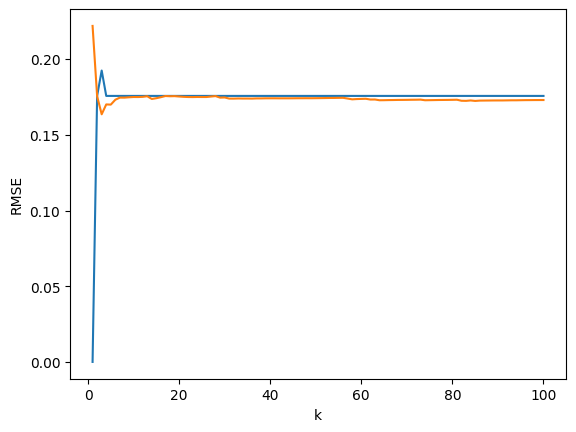

In [59]:
ax = training_errors.plot.line()
test_errors.plot.line(ax=ax)
ax.set_xlabel("k")
ax.set_ylabel("RMSE")

In [60]:
best_k=test_errors.idxmin()
best_k

3

**Given the analysis above, we can see that the best K Neighbor is 3.**

# Create a confusion matrix

The prediction accuracy is: 0.9691358024691358


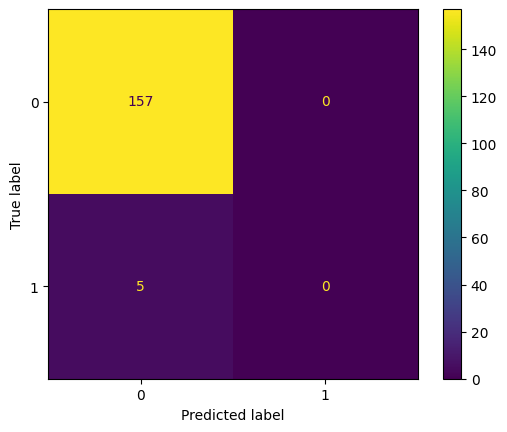

In [61]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print("The prediction accuracy is:", (y_train == predictions).mean())

By analyzing this graph, we can see that our model predicted whether or not a team won the Stanley Cup with 96.91% accuracy. Having 157 true negatives and 5 true positives is great. However, the data does not ever predict a team winning the Stanley Cup. This could be potentially fixed by expanding our data set.

# How much does each feature weight on if a team wins the Stanley Cup or not?

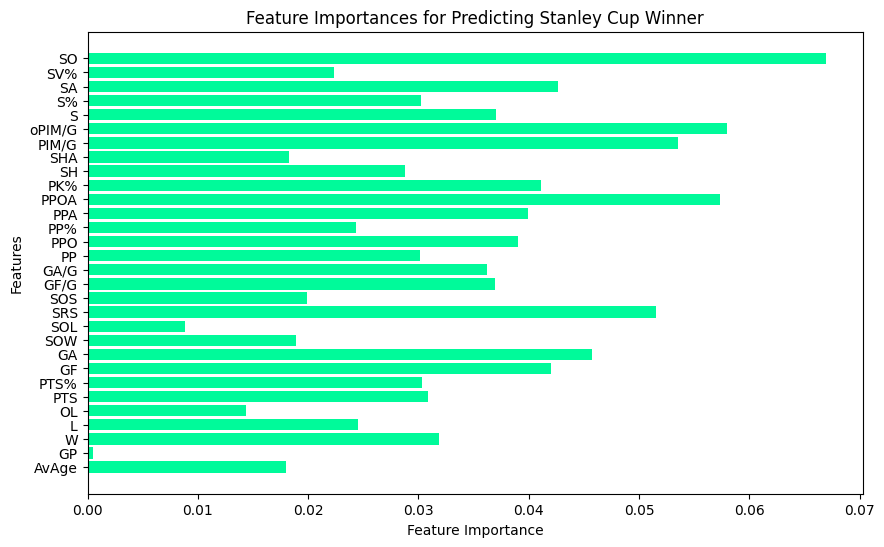

In [64]:
df = allSeasons

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=["Team", "Rk", "won_stanley_cup"])  # Exclude non-numeric columns and target variable
y = df["won_stanley_cup"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='mediumspringgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Predicting Stanley Cup Winner')
plt.show()


By analyzing this the horizontal bar graph above, we can see that SO (shut outs) had the greatest impact and factor on whether or not a team won the Stanley Cup, and GP (games played) had the least effect.